In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

**Step 1: Fetch Tata Motors Stock Data**

In [4]:
print("Fetching Tata Motors stock data...")
df = yf.download("TATAMOTORS.NS", start="2010-01-01", end="2023-12-31")
df = df[['Close']]
df.index.name = 'Date'

Fetching Tata Motors stock data...


[*********************100%***********************]  1 of 1 completed


In [5]:
df.to_csv("tatamotors_stock.csv")

# Inspect the data
print(df.head())
print(df.info())

Price                             Close
Ticker                    TATAMOTORS.NS
Date                                   
2010-01-04 00:00:00+00:00    163.535919
2010-01-05 00:00:00+00:00    160.686478
2010-01-06 00:00:00+00:00    160.933823
2010-01-07 00:00:00+00:00    155.432831
2010-01-08 00:00:00+00:00    156.283707
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3454 entries, 2010-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, TATAMOTORS.NS)  3454 non-null   float64
dtypes: float64(1)
memory usage: 54.0 KB
None


**Step 2: Visualize the Data**

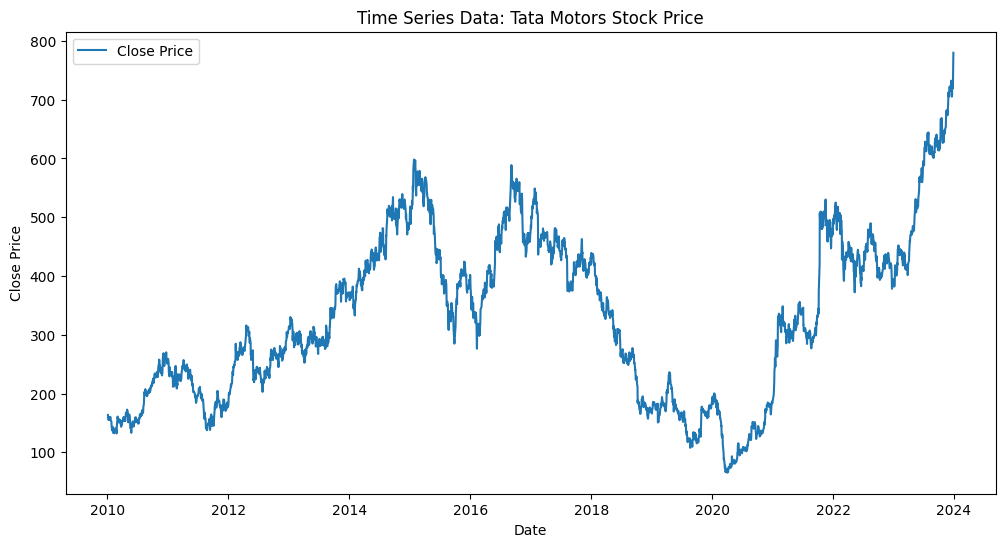

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title("Time Series Data: Tata Motors Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**Step 3: Check for Missing Values and Outliers**

Missing Values:
Price  Ticker       
Close  TATAMOTORS.NS    0
dtype: int64


<ipython-input-7-00512a738c1b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True)
<ipython-input-7-00512a738c1b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'].fillna(method='ffill', inplace=True)


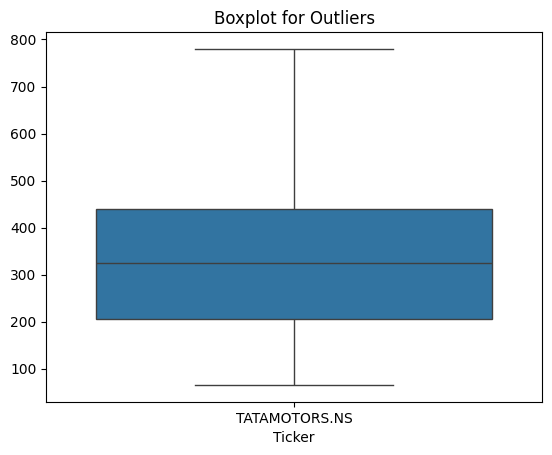

In [7]:
print("Missing Values:")
print(df.isnull().sum())

# Fill missing values if needed
df['Close'].fillna(method='ffill', inplace=True)

# Detect outliers using boxplot
sns.boxplot(df['Close'])
plt.title("Boxplot for Outliers")
plt.show()

**Step 4: Check Mean, Standard Deviation, and Variance**

In [8]:
print("Statistics:")
print(df['Close'].describe())

mean = df['Close'].mean()
std = df['Close'].std()
var = df['Close'].var()
print(f"Mean: {mean}, Std: {std}, Variance: {var}")

Statistics:
Ticker  TATAMOTORS.NS
count     3454.000000
mean       332.567273
std        141.315692
min         65.300003
25%        205.962494
50%        323.938049
75%        439.074997
max        779.950012
Mean: Ticker
TATAMOTORS.NS    332.567273
dtype: float64, Std: Ticker
TATAMOTORS.NS    141.315692
dtype: float64, Variance: Ticker
TATAMOTORS.NS    19970.124917
dtype: float64


**Step 5: Apply Transformations (Log Transform to Stabilize Variance)**

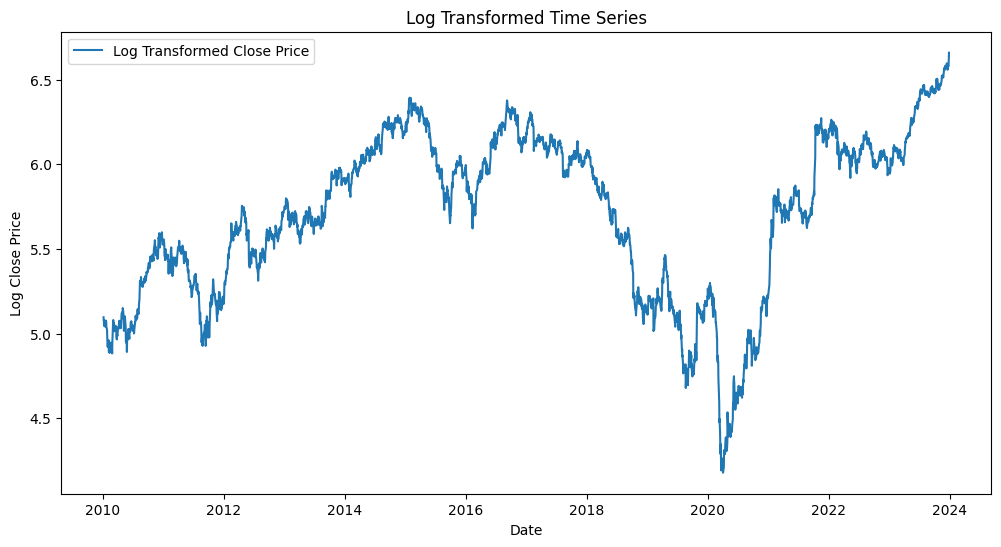

In [9]:
df['Log_Close'] = np.log(df['Close'])
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Log_Close'], label='Log Transformed Close Price')
plt.title("Log Transformed Time Series")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.legend()
plt.show()

**Step 6: Check for Stationarity Using ADF Test**

ADF Statistic: -1.2800342428570683
p-value: 0.6382564561771235
The series is not stationary. Differencing is needed.


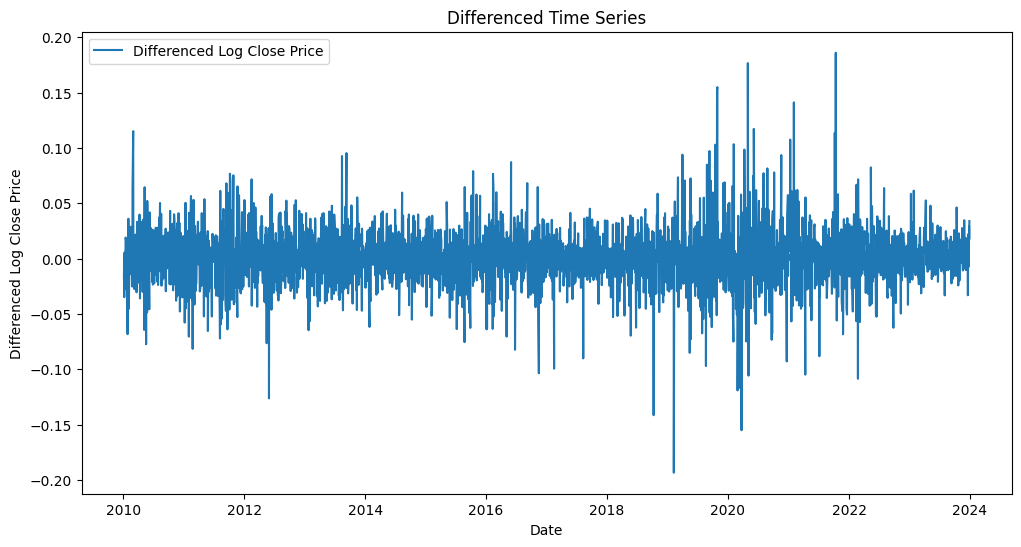

In [10]:
adf_test = adfuller(df['Log_Close'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is needed.")

# Differencing to achieve stationarity
df['Log_Close_Diff'] = df['Log_Close'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(df['Log_Close_Diff'], label='Differenced Log Close Price')
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced Log Close Price")
plt.legend()
plt.show()

**Step 7: ACF and PACF Plots**

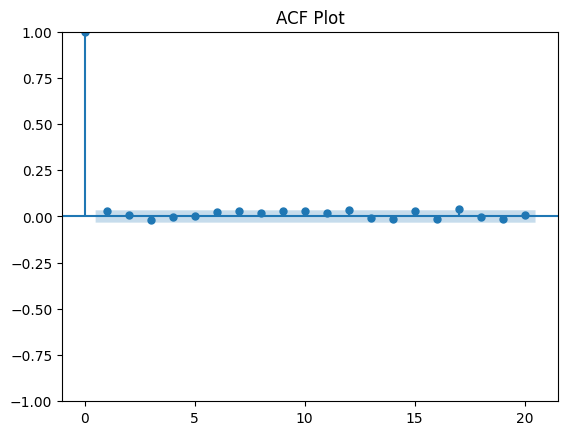

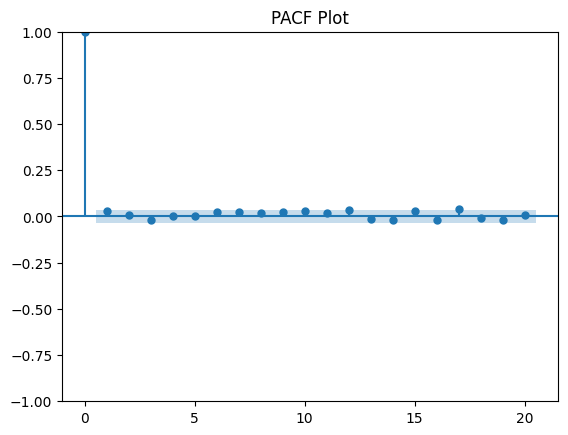

In [11]:
plot_acf(df['Log_Close_Diff'].dropna(), lags=20)
plt.title("ACF Plot")
plt.show()

plot_pacf(df['Log_Close_Diff'].dropna(), lags=20)
plt.title("PACF Plot")
plt.show()

**Step 8: Fit ARIMA Model**

In [12]:
# Using ARIMA(p,d,q) from ACF and PACF analysis
p = 1  # From PACF plot
d = 1  # First differencing
q = 1  # From ACF plot

model = ARIMA(df['Log_Close'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 3454
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7723.819
Date:                Sun, 24 Nov 2024   AIC                         -15441.638
Time:                        12:04:32   BIC                         -15423.197
Sample:                             0   HQIC                        -15435.052
                               - 3454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1241      0.427      0.291      0.771      -0.712       0.960
ma.L1         -0.0918      0.428     -0.215      0.830      -0.930       0.746
sigma2         0.0007   8.53e-06     78.261      0.0

**Step 9: Forecast and Evaluate**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


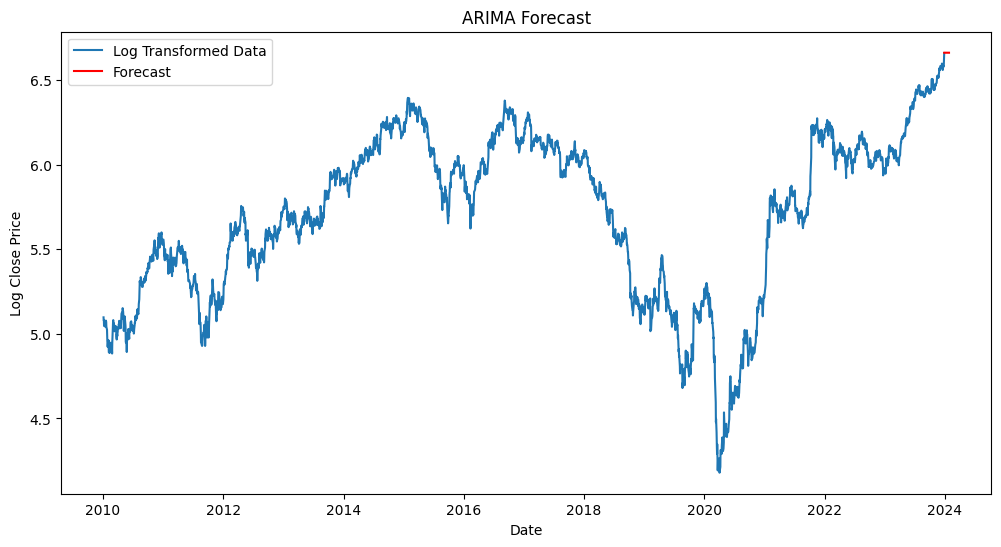

Forecast (Original Scale):
3454    780.852729
3455    780.964801
3456    780.978707
3457    780.980433
3458    780.980647
3459    780.980673
3460    780.980676
3461    780.980677
3462    780.980677
3463    780.980677
3464    780.980677
3465    780.980677
3466    780.980677
3467    780.980677
3468    780.980677
3469    780.980677
3470    780.980677
3471    780.980677
3472    780.980677
3473    780.980677
3474    780.980677
3475    780.980677
3476    780.980677
3477    780.980677
3478    780.980677
3479    780.980677
3480    780.980677
3481    780.980677
3482    780.980677
3483    780.980677
Name: predicted_mean, dtype: float64


In [13]:
forecast = model_fit.forecast(steps=30)  # Forecast the next 30 steps
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Log_Close'], label='Log Transformed Data')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.legend()
plt.show()

# Convert forecast back to original scale
forecast_original_scale = np.exp(forecast)
print("Forecast (Original Scale):")
print(forecast_original_scale)

**Step 10: Evaluate the Model**

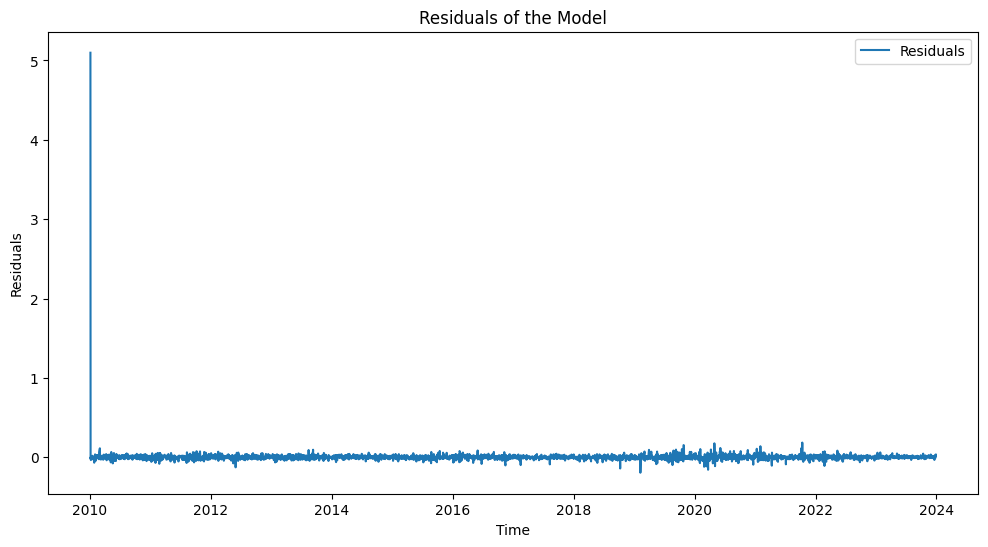

Residual Statistics:
count    3454.000000
mean        0.001912
std         0.090487
min        -0.194191
25%        -0.013171
50%         0.000148
75%         0.013735
max         5.097033
dtype: float64


In [14]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals")
plt.title("Residuals of the Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

print("Residual Statistics:")
print(residuals.describe())